# Fitting Pre-Industrial Experience to a Model: Lecture Support

* <https://github.com/braddelong/LSF18E101B/blob/master/Fitting_Pre-Industrial_Experience_to_a_Model-Lecture_Support.ipynb>
* <http://nbviewer.jupyter.org/github/braddelong/LSF18E101B/blob/master/Fitting_Pre-Industrial_Experience_to_a_Model-Lecture_Support.ipynb>
* <http://datahub.berkeley.edu/user-redirect/interact?account=&repo=nbviewer.jupyter.org&branch=braddelong&path=LSF18E101B/blob/master/Fitting_Pre-Industrial_Experience_to_a_Model-Lecture_Support.ipynb>
* <https://www.icloud.com/keynote/0OzjdiQ0B1z4NlvvDrOkkat9w>

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [4]:
# make sure graphs are displayed in main notebook

%matplotlib inline  

plt.style.use('seaborn-whitegrid') # graphics setup
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 7
plt.rcParams["figure.figsize"] = figure_size

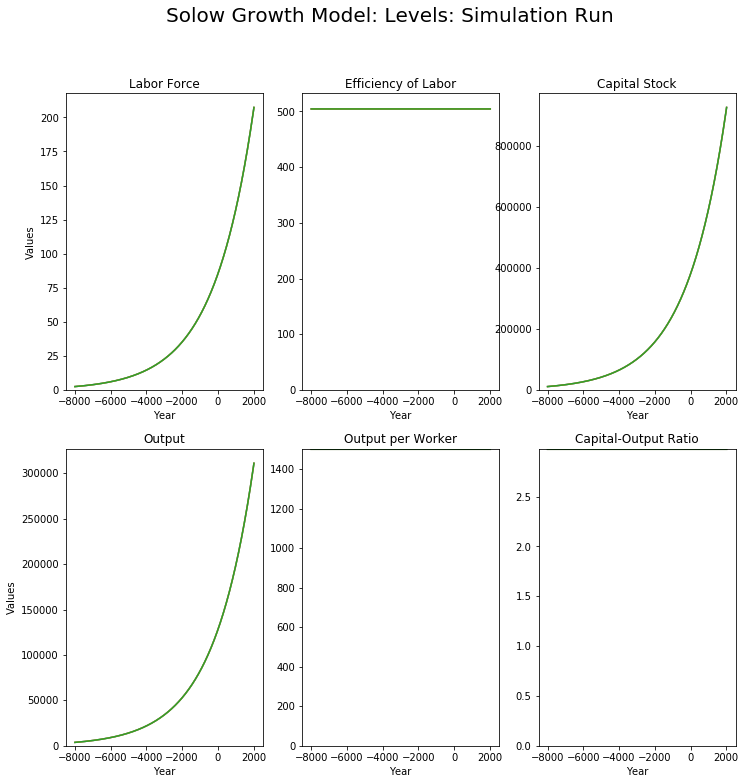

The blue line is the initial balanced-growth path;
the orange line is the alternative balanced growth path;
the green line is the track of the economy as it transitions
from the baseline to the alternative BGP.
 
0.000441 is the baseline labor-force growth rate
0.0 is the baseline efficiency-of-labor growth rate
0.15 is the baseline savings rate
 
0.000441 is the alternative labor-force growth rate
0.0 is the alternative efficiency-of-labor growth rate
0.15 is the alternative savings-investment rate
 
0.05 is the depreciation rate
0.5 is the orientation-of-growth-toward-capital parameter
 
 
 
85.1394697049457  = Labor Force in Year 0


In [1]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN MALTHUSIAN SIMULATIONS
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and base conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its base
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the base and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def sgm_malthus_10000yr_run(L0, E0, n=0.000, g=0.00, s=0.15, 
    alpha=0.5, delta=0.05, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 10000, graphs="LEVELS"):

    sg_df = pd.DataFrame(index=range(T),columns=['Year',
        'Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'Population',
        'BGP_base_Labor',
        'BGP_base_Efficiency',
        'BGP_base_Output',
        'BGP_base_Output_per_Worker',
        'BGP_base_Capital_Output_Ratio',
        'BGP_base_Capital',
        'BGP_base_Population',
        'BGP_alt_Labor',
        'BGP_alt_Efficiency',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio',
        'BGP_alt_Capital',
        'BGP_alt_Population'],
        dtype='float')

    sg_df.Year[0] = -8000
    sg_df.Labor[0] = L0
    sg_df.Population[0] = 2 * L0
    sg_df.BGP_base_Labor[0] = L0
    sg_df.BGP_base_Population[0] = 2 * sg_df.BGP_base_Labor[0]
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_base_Efficiency[0] = E0
    sg_df.BGP_alt_Efficiency[0] = E0
    sg_df.BGP_alt_Population[0] = 2 * sg_df.BGP_alt_Labor[0]

    KoverY_base_steady_state = s/(n+g+delta)
    YoverL_base_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_base_steady_state = (YoverL_base_steady_state *
        KoverY_base_steady_state)
    
    sg_df.Capital[0] = KoverL_base_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_base_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_base_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_base_Output[0] = sg_df.BGP_base_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_base_Capital[0] = sg_df.BGP_base_Output[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0])
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_alt_Output[0] = sg_df.BGP_alt_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_alt_Capital[0] = sg_df.BGP_alt_Output[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0])
    
    for i in range(T):
        sg_df.Year[i+1] = sg_df.Year[i]+1
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Population[i+1] = 2 * sg_df.Labor[i+1]
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])

    for i in range(T):
        sg_df.BGP_base_Labor[i+1] = (sg_df.BGP_base_Labor[i] * np.exp(n))
        sg_df.BGP_base_Population[i+1] = 2 * sg_df.BGP_base_Labor[i+1]
        sg_df.BGP_base_Efficiency[i+1] = (sg_df.BGP_base_Efficiency[i] * np.exp(g))
        sg_df.BGP_base_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_base_Output_per_Worker[i+1] = sg_df.BGP_base_Efficiency[i+1] * (
            sg_df.BGP_base_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_base_Output[i+1] = (sg_df.BGP_base_Output_per_Worker[i+1] * 
            sg_df.BGP_base_Labor[i+1])
        sg_df.BGP_base_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])

    for i in range(T):
        sg_df.BGP_alt_Labor[i+1] = (sg_df.BGP_alt_Labor[i] * np.exp(n + Delta_n))
        sg_df.BGP_alt_Population[i+1] = 2 * sg_df.BGP_alt_Labor[i+1]
        sg_df.BGP_alt_Efficiency[i+1] = (sg_df.BGP_alt_Efficiency[i] * np.exp(g+Delta_g))
        sg_df.BGP_alt_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_alt_Output_per_Worker[i+1] = sg_df.BGP_alt_Efficiency[i+1] * (
            sg_df.BGP_alt_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_alt_Output[i+1] = (sg_df.BGP_alt_Output_per_Worker[i+1] * 
            sg_df.BGP_alt_Labor[i+1])
        sg_df.BGP_alt_Capital[i+1] = ((s + Delta_s) / (n + Delta_n + g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_alt_Efficiency[i+1] * sg_df.BGP_alt_Labor[i+1])  

    sg_df.Population = 2 * sg_df.Labor
    
    sg_df = sg_df.set_index("Year")
        
    if (graphs == "LEVELS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        sg_df.BGP_base_Labor.plot(ax = ax1, title = "BGP (base) Labor")
        sg_df.BGP_alt_Labor.plot(ax = ax1, title = "BGP (alt) Labor")
        sg_df.Labor.plot(ax = ax1, title = "Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        sg_df.BGP_base_Efficiency.plot(ax = ax2, title = "BGP (base) Efficiency")
        sg_df.BGP_alt_Efficiency.plot(ax = ax2, title = "BGP (alt) Efficiency")
        sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        sg_df.BGP_base_Capital.plot(ax = ax3, title = "BGP (base) Capital Stock")
        sg_df.BGP_alt_Capital.plot(ax = ax3, title = "BGP (alt) Capital Stock")
        sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        sg_df.BGP_base_Output.plot(ax = ax4, title = "BGP (base) Output")
        sg_df.BGP_alt_Output.plot(ax = ax4, title = "BGP (alt) Output")
        sg_df.Output.plot(ax = ax4, title = "Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        sg_df.BGP_base_Output_per_Worker.plot(ax = ax5, title = "BGP (base) Output per Worker")
        sg_df.BGP_alt_Output_per_Worker.plot(ax = ax5, title = "BGP (alt) Output per Worker")
        sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Levels: Simulation Run', size = 20)

        plt.show()
        
    if (graphs == "LOGS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        np.log(sg_df.BGP_base_Labor).plot(ax = ax1, title = "BGP (base) Labor")
        np.log(sg_df.BGP_alt_Labor).plot(ax = ax1, title = "BGP (alt) Labor")
        np.log(sg_df.Labor).plot(ax = ax1, title = "Log Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        np.log(sg_df.BGP_base_Efficiency).plot(ax = ax2, title = "BGP (base) Efficiency")
        np.log(sg_df.BGP_alt_Efficiency).plot(ax = ax2, title = "BGP (alt) Efficiency")
        np.log(sg_df.Efficiency).plot(ax = ax2, title = "Log Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        np.log(sg_df.BGP_base_Capital).plot(ax = ax3, title = "BGP (base) Capital Stock")
        np.log(sg_df.BGP_alt_Capital).plot(ax = ax3, title = "BGP (alt) Capital Stock")
        np.log(sg_df.Capital).plot(ax = ax3, title = "Log Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        np.log(sg_df.BGP_base_Output).plot(ax = ax4, title = "BGP (base) Output")
        np.log(sg_df.BGP_alt_Output).plot(ax = ax4, title = "BGP (alt) Output")
        np.log(sg_df.Output).plot(ax = ax4, title = "Log Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        np.log(sg_df.BGP_base_Output_per_Worker).plot(ax = ax5, title = "BGP (base) Output per Worker")
        np.log(sg_df.BGP_alt_Output_per_Worker).plot(ax = ax5, title = "BGP (alt) Output per Worker")
        np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Log Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Logs: Simulation Run', size = 20)

        plt.show()
    
    if ((graphs != "LEVELS") and (graphs != "LOGS")):
        fig = "NONE"
        
    print("The blue line is the initial balanced-growth path;")
    print("the orange line is the alternative balanced growth path;")
    print("the green line is the track of the economy as it transitions")
    print("from the baseline to the alternative BGP.")
    print(" ")
    
    print(n + Delta_n, "is the baseline labor-force growth rate")
    print(g + Delta_g, "is the baseline efficiency-of-labor growth rate")
    print(s + Delta_s, "is the baseline savings rate")
    print(" ")
          
    print(n + Delta_n, "is the alternative labor-force growth rate")
    print(g + Delta_g, "is the alternative efficiency-of-labor growth rate")
    print(s + Delta_s, "is the alternative savings-investment rate")
    print(" ")
    
    print(delta, "is the depreciation rate")
    print(alpha, "is the orientation-of-growth-toward-capital parameter")
    
    
    SGM_dict = {}
    SGM_dict["df"] = sg_df
    SGM_dict["plots"] = fig
    
    return SGM_dict

output = sgm_malthus_10000yr_run(L0=2.5, E0=504.41000009638856, 
    T = 10019, n= 0.000441 , graphs = "LEVELS")

print(" ")
print(" ")
print(" ")
print(output["df"].Labor[0], " = Labor Force in Year 0")

In [95]:
output["df"]


Labor  Efficiency        Capital         Output  \
Year                                                            
-8000.0    2.500000      504.41   11151.642515    3750.000001   
-7999.0    2.501103      504.41   11156.561474    3751.654115   
-7998.0    2.502206      504.41   11161.482603    3753.308960   
-7997.0    2.503310      504.41   11166.405902    3754.964534   
-7996.0    2.504414      504.41   11171.331373    3756.620839   
-7995.0    2.505519      504.41   11176.259017    3758.277874   
-7994.0    2.506624      504.41   11181.188834    3759.935640   
-7993.0    2.507729      504.41   11186.120826    3761.594137   
-7992.0    2.508836      504.41   11191.054993    3763.253366   
-7991.0    2.509942      504.41   11195.991336    3764.913327   
-7990.0    2.511049      504.41   11200.929857    3766.574020   
-7989.0    2.512157      504.41   11205.870557    3768.235445   
-7988.0    2.513265      504.41   11210.813436    3769.897603   
-7987.0    2.514374      504.41   11215.758495    3771.560495   
-7986.0    2.515483      504.41   11220.705735    3773.224120   
-7985.0    2.516592      504.41   11225.655157    3774.888479   
-7984.0    2.517702      504.41   11230.606763    3776.553572   
-7983.0    2.518813      504.41   11235.560553    3778.219399   
-7982.0    2.519924      504.41   11240.516528    3779.885961   
-7981.0    2.521036      504.41   11245.474689    3781.553258   
-7980.0    2.522148      504.41   11250.435037    3783.221291   
-7979.0    2.523260      504.41   11255.397573    3784.890060   
-7978.0    2.524373      504.41   11260.362298    3786.559564   
-7977.0    2.525487      504.41   11265.329213    3788.229805   
-7976.0    2.526601      504.41   11270.298318    3789.900783   
-7975.0    2.527715      504.41   11275.269616    3791.572498   
-7974.0    2.528830      504.41   11280.243107    3793.244950   
-7973.0    2.529945      504.41   11285.218791    3794.918140   
-7972.0    2.531061      504.41   11290.196670    3796.592068   
-7971.0    2.532178      504.41   11295.176745    3798.266734   
...             ...         ...            ...            ...   
 1989.0  204.678352      504.41  912999.924439  307017.527924   
 1990.0  204.768635      504.41  913402.646200  307152.952513   
 1991.0  204.858958      504.41  913805.545599  307288.436837   
 1992.0  204.949321      504.41  914208.622717  307423.980923   
 1993.0  205.039723      504.41  914611.877631  307559.584797   
 1994.0  205.130166      504.41  915015.310419  307695.248486   
 1995.0  205.220648      504.41  915418.921161  307830.972015   
 1996.0  205.311170      504.41  915822.709934  307966.755412   
 1997.0  205.401732      504.41  916226.676817  308102.598702   
 1998.0  205.492335      504.41  916630.821889  308238.501913   
 1999.0  205.582977      504.41  917035.145228  308374.465070   
 2000.0  205.673659      504.41  917439.646913  308510.488200   
 2001.0  205.764381      504.41  917844.327023  308646.571329   
 2002.0  205.855143      504.41  918249.185636  308782.714484   
 2003.0  205.945945      504.41  918654.222831  308918.917692   
 2004.0  206.036787      504.41  919059.438687  309055.180979   
 2005.0  206.127670      504.41  919464.833282  309191.504371   
 2006.0  206.218592      504.41  919870.406696  309327.887894   
 2007.0  206.309554      504.41  920276.159007  309464.331576   
 2008.0  206.400557      504.41  920682.090294  309600.835444   
 2009.0  206.491600      504.41  921088.200637  309737.399522   
 2010.0  206.582683      504.41  921494.490114  309874.023839   
 2011.0  206.673806      504.41  921900.958804  310010.708420   
 2012.0  206.764969      504.41  922307.606786  310147.453293   
 2013.0  206.856172      504.41  922714.434139  310284.258483   
 2014.0  206.947416      504.41  923121.440943  310421.124017   
 2015.0  207.038700      504.41  923528.627276  310558.049923   
 2016.0  207.130024      504.41  923935.993219  310695.036226   
 2017.0  207.221389      504.41  924343.538849  3

In [96]:
print(output["df"].Population[0], "= model population at Roman Empire founding")
print(output["df"].Population[500], "= model population in 500 AD")
print(output["df"].Population[1000], "= model population in 1000 AD")
print(output["df"].Population[1500], "= model population in 1500 AD")
print(output["df"].Population[1750], "= model population in 1750 AD")
print(output["df"].Population[1900], "= model population in 1900 AD")
print(output["df"].Population[2000], "= model population in 2000 AD")

170.2789394098914 = model population at Roman Empire founding
212.28674094681443 = model population in 500 AD
264.6578639613148 = model population in 1000 AD
329.94893908194734 = model population in 1500 AD
368.4068552704084 = model population in 1750 AD
393.601081321362 = model population in 1900 AD
411.3473175209178 = model population in 2000 AD


<https://github.com/braddelong/LSS18E101b/blob/master/2018-02-04_Malthusian.ipynb>

<http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LSS18E101b&branch=master&path=2018-02-04_Malthusian.ipynb>

